<a href="https://colab.research.google.com/github/tanmoyee04/The-Uplift-project/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading the dataset

dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# identifying and separating dependent and independent variables
# Here independent variable is level and dependent variable is salary

X = dataset.iloc[:,1:2].values  #Independent variable
y = dataset.iloc[:,2].values  #Dependent variable

In [8]:
# Linear regression model is used for comparing the result with polynomial regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

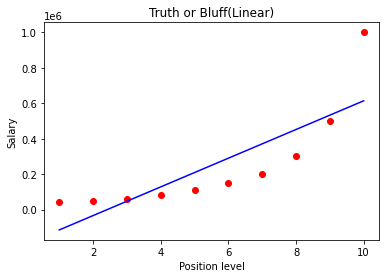

In [9]:
# Visualizing the result of linear regression

plt.scatter(X,y, color='red')
plt.plot(X, lin_reg.predict(X),color='blue')
plt.title("Truth or Bluff(Linear)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [4]:
# Fitting the polynomial regression model

from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2) # Degree of the polynomial
X_poly = pr.fit_transform(X)

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
X_poly 
# The first column is the column of 1s for the constant. 
#X containing real values is the middle column ie x1. 
#The second column is square of x1.

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [10]:
# The fit must be included in a multiple linear regression model

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

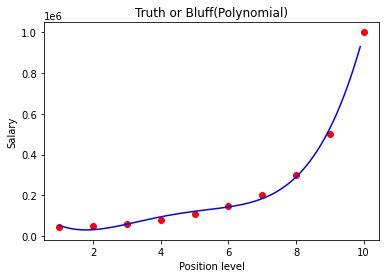

In [12]:
# Visualizing the polynomial regression model

from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=4)
X_poly = pr.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 

plt.plot(X_grid, lin_reg2.predict(pr.fit_transform(X_grid)),color='blue') 

plt.title("Truth or Bluff(Polynomial)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [13]:
# Predicting the result

lin_reg.predict([[6.5]])

array([330378.78787879])

In [14]:
lin_reg2.predict(pr.fit_transform([[6.5]]))

array([158862.45265155])